# Linear Regression

### regression
- Simple Linear Regression (one independent variable and one dependent variable)
- Multiple Linear Regression (multiple independent variables and one dependent variable)

In [5]:
# !pip install numpy pandas matplotlib seaborn scikit-learn streamlit -q

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(243, 7)

In [13]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [14]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [15]:
df['sex'].value_counts()

sex
Male      157
Female     86
Name: count, dtype: int64

*male are more then women*

In [16]:
df['smoker'].value_counts()

smoker
No     151
Yes     92
Name: count, dtype: int64

*Non smoker are less then smoker*

In [17]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64

*Sat has the more visitors*

In [18]:
df['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

<Axes: xlabel='total_bill', ylabel='tip'>

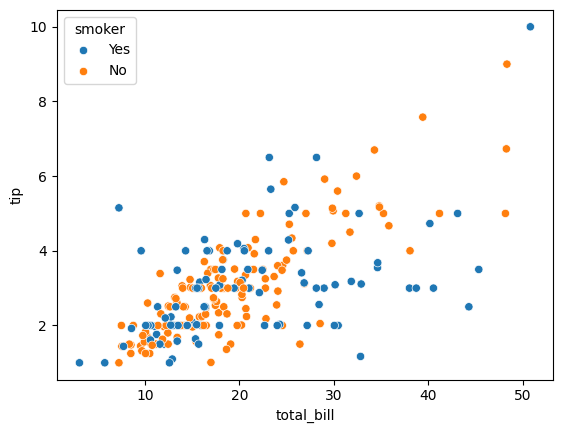

In [19]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='smoker')

In [20]:
x=df[['total_bill']]
y=df['tip']

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
print(x_train.shape)
print(y_train.shape)

(194, 1)
(194,)


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print(model.coef_)
print(model.intercept_)

print(f'Y= {model.intercept_} + {model.coef_}*X ')


[0.11254265]
0.7727736680690906
Y= 0.7727736680690906 + [0.11254265]*X 


## Model Prediction

In [24]:
y_pred = model.predict(x_test)
y_pred

array([2.32698761, 2.56782887, 3.84293705, 1.58870785, 1.71250476,
       2.36525211, 2.87056859, 4.6701255 , 3.83168279, 2.63873074,
       2.83793122, 1.75977267, 3.33424429, 2.40239118, 4.67237636,
       3.262217  , 3.10128102, 4.74102737, 2.69387664, 4.69263403,
       2.38325893, 2.60946965, 1.93646463, 2.19756357, 2.96622984,
       5.05051965, 2.92008736, 1.9308375 , 2.32698761, 3.0540131 ,
       3.12491497, 3.81705225, 2.28309598, 2.53856779, 2.82555153,
       2.10865488, 3.19244056, 3.48280059, 3.6493637 , 2.12553627,
       2.43615398, 2.87844658, 3.4749226 , 2.64773415, 2.52056096,
       3.83393364, 2.7433954 , 2.57345601, 3.98586621])

### Evaluate the mdoel

In [25]:
print(f"MSE {mean_squared_error(y_test, y_pred)}")
print(f"R2 {r2_score(y_test, y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}")

MSE 1.0265095307105117
R2 0.030261718943347837
RMSE 1.0131680663693026


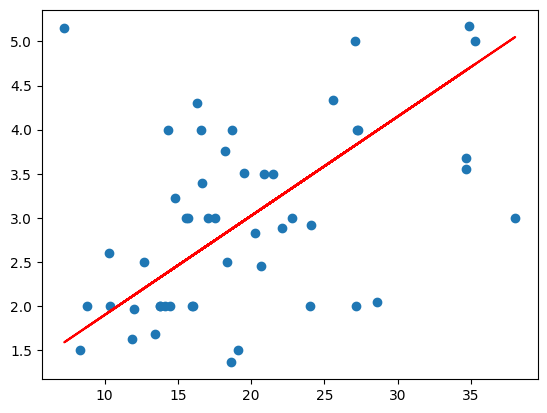

In [26]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')


In [27]:
model.predict([[15]])

c:\Users\MR OSMAN\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.46091336])

# Multi Linear Regression

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
import seaborn as sns
df_tips=sns.load_dataset('tips')

In [30]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
print(df_tips.shape)
print(df_tips.columns)
print(df_tips.isnull().sum())
print(df_tips.duplicated().sum())
print(df_tips.info())

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [32]:
# remove duplicate
df_tips.drop_duplicates(inplace=True)

In [33]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
print(df_tips['smoker'].value_counts())
print(df_tips['day'].value_counts())
print(df_tips['time'].value_counts())

smoker
No     151
Yes     92
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      67
Name: count, dtype: int64


In [35]:
# convert all the catagorical variable into numerical variable
le = LabelEncoder()
df_tips['smoker_scale'] = le.fit_transform(df_tips['smoker'])
df_tips['day_scale'] = le.fit_transform(df_tips['day'])
df_tips['time_scale'] = le.fit_transform(df_tips['time'])
df_tips['sex_scale'] = le.fit_transform(df_tips['sex'])

In [36]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,2,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,2,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2,0,0


In [37]:
df_tips.drop(columns=['sex','smoker','day','time'],inplace=True)

In [38]:
df_tips.head()

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,2,0,2,0,0
1,10.34,1.66,3,0,2,0,1
2,21.01,3.50,3,0,2,0,1
3,23.68,3.31,2,0,2,0,1
4,24.59,3.61,4,0,2,0,0


In [39]:
df_tips.describe(include='all')

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016,0.378601,1.736626,0.275720,0.646091
std,8.910071,1.385002,0.952356,0.486040,0.925185,0.447799,0.479168
min,3.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.380000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,17.810000,2.920000,2.000000,0.000000,2.000000,0.000000,1.000000
75%,24.175000,3.575000,3.000000,1.000000,2.500000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,3.000000,1.000000,1.000000


<Axes: xlabel='tip', ylabel='Count'>

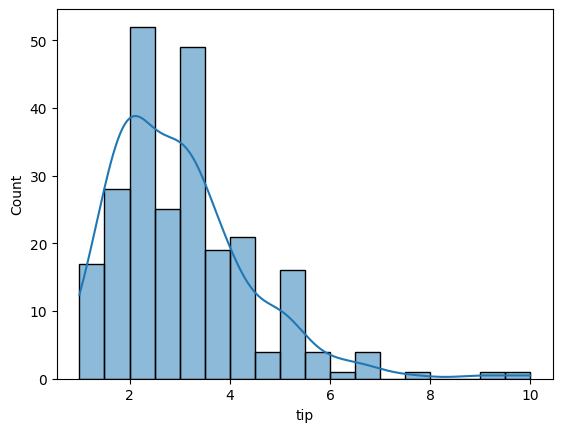

In [40]:
sns.histplot(df_tips['tip'], kde=True)

In [41]:
df_tips.head()

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,2,0,2,0,0
1,10.34,1.66,3,0,2,0,1
2,21.01,3.50,3,0,2,0,1
3,23.68,3.31,2,0,2,0,1
4,24.59,3.61,4,0,2,0,0


In [42]:
x=df_tips.drop('tip', axis=1)
y=df_tips['tip']

In [43]:
print(x.shape)
print(y.shape)

(243, 6)
(243,)


In [44]:
y.value_counts()

tip
2.00    32
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

In [45]:
x.head()

,total_bill,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,2,0,2,0,0
1,10.34,3,0,2,0,1
2,21.01,3,0,2,0,1
3,23.68,2,0,2,0,1
4,24.59,4,0,2,0,0


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [47]:
print(x_train.shape)
print(y_train.shape)

(194, 6)
(194,)


In [48]:
print(x_test.shape)
print(y_test.shape)

(49, 6)
(49,)


In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
print(lr.coef_)
print(lr.intercept_)

[ 0.09282279  0.09401601 -0.01568514  0.05427442 -0.04840395 -0.03752562]
0.8671064947684344


In [51]:
y_pred = lr.predict(x_test)
y_pred

array([3.15814544, 1.9276314 , 2.9267519 , 2.90076132, 4.32165223,
       2.6946363 , 1.83377251, 3.30901135, 3.029785  , 2.95213463,
       3.18961241, 2.20638841, 3.66168218, 2.57322837, 2.90309108,
       2.12841726, 2.82229914, 2.72598948, 4.0564784 , 2.21713064,
       2.37140641, 2.4080445 , 2.791172  , 2.61255574, 3.61665129,
       3.44028799, 3.27603234, 3.0531629 , 3.75622727, 4.87444083,
       2.80068491, 2.60151173, 2.95814119, 3.1051975 , 2.07945181,
       3.16685705, 4.69191802, 2.94969241, 2.49774014, 2.29015955,
       4.06688253, 5.7460449 , 3.86054899, 3.14930036, 3.34926761,
       2.74074659, 2.03983911, 4.77242854, 4.06847205])

In [52]:
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²", r2_score(y_test, y_pred))

MSE 1.3031616818757823
RMSE 1.1415610723372545
R² 0.4777193750576083


In [53]:
lr.predict([[19.50, 3, 1, 3, 1, 1]])

c:\Users\MR OSMAN\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.02040752])